


# Pandas за 30 минут



Обычно импорт выглядит так и к нему все привыкли:

In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd

## Создание объекта

Создание `Серии` ([`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)) путем передачи списка позволет pandas создать целочисленный индекс по умолчанию:

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Создание `DataFrame` ([`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)) путем передачи массива NumPy :

In [9]:
# указываем начало временнОго периода и число повторений (дни по умолчанию)
dates = pd.date_range('20130101', periods=6,freq='D') 
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
np.random.randn(6, 4)

array([[-0.39945667, -0.30473127, -1.41694137, -0.63087104],
       [-1.505024  , -0.1335701 ,  0.44335123, -0.40994383],
       [-0.17603791,  0.31432882, -0.73352665, -0.89369509],
       [ 0.89656965,  1.02690359,  1.49558016, -0.63580928],
       [ 1.87946724,  1.1789717 , -1.45211962, -0.50063875],
       [ 0.5170033 ,  0.26847885, -0.30487171, -0.02806693]])

In [10]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,0.823078,1.510428,1.158999,-1.595672
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313
2013-01-05,-2.065539,0.496241,-0.292475,0.004226
2013-01-06,-0.730772,-0.145616,0.040297,-1.601352


In [11]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [12]:
dict_py = {'A': 1.,
                    'B': pd.Timestamp('20130102'), # временнАя метка
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'), # Серия на основе списка
                    'D': np.array([3] * 4, dtype='int32'), # массив целых чисел NumPy 
                    'E': pd.Categorical(["test", "train", "test", "train"]), # категории
                    'F': 'foo'}

dict_py

{'A': 1.0, 'B': Timestamp('2013-01-02 00:00:00'), 'C': 0    1.0
 1    1.0
 2    1.0
 3    1.0
 dtype: float32, 'D': array([3, 3, 3, 3], dtype=int32), 'E': ['test', 'train', 'test', 'train']
 Categories (2, object): ['test', 'train'], 'F': 'foo'}

Создать [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) можно путем передачи словаря объектов, которые можно преобразовать в серию.

In [13]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'), # временнАя метка
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'), # Серия на основе списка
                    'D': np.array([3] * 4, dtype='int32'), # массив целых чисел NumPy 
                    'E': pd.Categorical(["test", "train", "test", "train"]), # категории
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Столбцы итогового [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) имеют разные [типы данных](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes).

In [16]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Если вы используете `IPython` или `Jupyter (Lab) Notebook (Colab)`, то по нажатию TAB после точки отобразятся публичные атрибуты объекта (в данном случае `DataFrame`): 

In [ ]:
# Попробуйте убрать комментарий и нажать TAB
# df2.<TAB>  

In [18]:
df2.

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## Просмотр данных

Просмотрим верхние и нижние строки полученного DataFrame:

In [21]:
df.head()

,A,B,C,D
2013-01-01,0.823078,1.510428,1.158999,-1.595672
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313
2013-01-05,-2.065539,0.496241,-0.292475,0.004226
2013-01-06,-0.730772,-0.145616,0.040297,-1.601352


In [22]:
df.tail(3) # вывести последние три строки

,A,B,C,D
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313
2013-01-05,-2.065539,0.496241,-0.292475,0.004226
2013-01-06,-0.730772,-0.145616,0.040297,-1.601352


Отобразим индекс и столбцы:

In [23]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [24]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Метод [`DataFrame.to_numpy()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) представляет данные в виде массива NumPy, на котором строится DataFrame. 

In [26]:
df.values

array([[ 0.82307783,  1.51042777,  1.15899885, -1.59567208],
       [ 1.77148123, -0.98137625, -0.00777444, -1.37213848],
       [-0.90321111, -1.04328754, -0.33285602,  0.62536587],
       [-0.33520024,  0.31216862, -2.12383782, -1.95031318],
       [-2.06553862,  0.49624056, -0.29247463,  0.00422565],
       [-0.73077152, -0.14561578,  0.04029696, -1.6013522 ]])

Обратите внимание, что эта операция может занять много времени, если ваш `DataFrame` имеет столбцы с разными типами данных, что сводится к фундаментальному различию между pandas и `NumPy`: массивы `NumPy` имеют один тип данных для всего массива, тогда как `DataFrames` в pandas имеет один тип данных для каждого столбца. Когда вы вызываете `DataFrame.to_numpy()`, pandas определит тип данных `NumPy`, который может содержать все типы данных `DataFrame`. Этот тип данных может в конечном итоге оказаться объектом (`object`, т.е. строкой), что потребует приведения каждого значения к объекту Python.

Наш `DataFrame` содержит значения с плавающей точкой, поэтому `DataFrame.to_numpy()` сработает быстро и не требует копирования данных.

Для df2, который содержит несколько типов данных, вызов `DataFrame.to_numpy()` является относительно дорогостоящим:

In [ ]:
df2.to_numpy()

Метод [`describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) показывает краткую статистическую сводку для данных:

In [27]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.240027,0.024760,-0.259608,-0.981647
std,1.356359,0.968934,1.062789,1.039836
min,-2.065539,-1.043288,-2.123838,-1.950313
25%,-0.860101,-0.772436,-0.322761,-1.599932
50%,-0.532986,0.083276,-0.150125,-1.483905
75%,0.533508,0.450223,0.028279,-0.339865
max,1.771481,1.510428,1.158999,0.625366


Транспонируем данные:

In [30]:
df_copy = df.T

In [34]:
df_copy

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.823078,1.771481,-0.903211,-0.335200,-2.065539,-0.730772
B,1.510428,-0.981376,-1.043288,0.312169,0.496241,-0.145616
C,1.158999,-0.007774,-0.332856,-2.123838,-0.292475,0.040297
D,-1.595672,-1.372138,0.625366,-1.950313,0.004226,-1.601352


Сортировка по столбцам, см. [`sort_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html):

In [42]:
df.sort_index(axis=1, ascending=False) # по умолчанию axis=0, т.е. сортировка по строкам

,D,C,B,A
2013-01-01,-1.595672,1.158999,1.510428,0.823078
2013-01-02,-1.372138,-0.007774,-0.981376,1.771481
2013-01-03,0.625366,-0.332856,-1.043288,-0.903211
2013-01-04,-1.950313,-2.123838,0.312169,-0.335200
2013-01-05,0.004226,-0.292475,0.496241,-2.065539
2013-01-06,-1.601352,0.040297,-0.145616,-0.730772


Сортировка по значениям, см. [`sort_values()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values):

In [36]:
df.sort_values(by=['B','A']) # по умолчанию сортировка по индексу, выбрали столбец 'B'

,A,B,C,D
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138
2013-01-06,-0.730772,-0.145616,0.040297,-1.601352
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313
2013-01-05,-2.065539,0.496241,-0.292475,0.004226
2013-01-01,0.823078,1.510428,1.158999,-1.595672


## Выбор

Рекомендуем использовать оптимизированные методы pandas для доступа к данным:  `.ix`, `.loc` и `.iloc`.

Подробнее см. [Документацию по индексированию и выбору данных](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) и [Мультииндексу](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).

### Получение

Выбор столбца, который возвращает [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series), эквивалентно `df.A`:

In [48]:
df[['C','B']]

,C,B
2013-01-01,1.158999,1.510428
2013-01-02,-0.007774,-0.981376
2013-01-03,-0.332856,-1.043288
2013-01-04,-2.123838,0.312169
2013-01-05,-0.292475,0.496241
2013-01-06,0.040297,-0.145616


Выбор с помощью `[ ]`, вырезает строки:

In [53]:
df[:-1]

,A,B,C,D
2013-01-01,0.823078,1.510428,1.158999,-1.595672
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313
2013-01-05,-2.065539,0.496241,-0.292475,0.004226


In [55]:
df['20130102':'20130103']

,A,B,C,D
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366


### Выбор по метке

Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label)

Для получения строки с помощью метки:

In [61]:
df.loc['2013-01-02','A'] # метка индекса Timestamp('2013-01-01 00:00:00', freq='D')

1.7714812325416793

Выбор по нескольким осям:

In [62]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.823078,1.510428
2013-01-02,1.771481,-0.981376
2013-01-03,-0.903211,-1.043288
2013-01-04,-0.335200,0.312169
2013-01-05,-2.065539,0.496241
2013-01-06,-0.730772,-0.145616


При отображении срезов меток включаются обе конечные точки:

In [64]:
df.loc['20130102':'20130104', ['C', 'B']]

,C,B
2013-01-02,-0.007774,-0.981376
2013-01-03,-0.332856,-1.043288
2013-01-04,-2.123838,0.312169


Уменьшение размерности возвращаемого объекта:

In [65]:
df.loc['20130102', ['A', 'B']]

A    1.771481
B   -0.981376
Name: 2013-01-02 00:00:00, dtype: float64

Для получения скалярного значения:

In [ ]:
df.loc[dates[0], 'A']

In [68]:
df['C']<0

2013-01-01    False
2013-01-02     True
2013-01-03     True
2013-01-04     True
2013-01-05     True
2013-01-06    False
Freq: D, Name: C, dtype: bool

In [67]:
df.loc[df['C']<0]

,A,B,C,D
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313
2013-01-05,-2.065539,0.496241,-0.292475,0.004226


Для получения быстрого доступа к скаляру (эквивалентно предыдущему методу):

In [ ]:
df.at[dates[0], 'A']

### Выбор по позиции

Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer)

Выбор позиции с помощью целых чисел:

In [70]:
df

,A,B,C,D
2013-01-01,0.823078,1.510428,1.158999,-1.595672
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313
2013-01-05,-2.065539,0.496241,-0.292475,0.004226
2013-01-06,-0.730772,-0.145616,0.040297,-1.601352


In [71]:
df.iloc[2]

A   -0.903211
B   -1.043288
C   -0.332856
D    0.625366
Name: 2013-01-03 00:00:00, dtype: float64

По целочисленным срезам, действующим аналогично NumPy / Python, т.е. правое граничное значение не включается:

In [73]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.335200,0.312169
2013-01-05,-2.065539,0.496241


По спискам целочисленных позиций, аналогично стилю NumPy / Python:

In [74]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.771481,-0.007774
2013-01-03,-0.903211,-0.332856
2013-01-05,-2.065539,-0.292475


Для явного создания среза строк:

In [75]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366


Для явного создания среза столбцов:

In [ ]:
df.iloc[:, 1:3]

Для явного получения значений:

In [ ]:
df.iloc[1, 1]

Для получения быстрого доступа к скаляру (эквивалентно предыдущему методу):

In [ ]:
df.iat[1, 1]

### Булево индексирование

Использование значений одного столбца для выбора данных:

In [77]:
df[(df['A'] > 0)&(df['B']>0)]

,A,B,C,D
2013-01-01,0.823078,1.510428,1.158999,-1.595672


Выбор значений из `DataFrame`, для которых выполняется логическое условие:

In [ ]:
df[df > 0]

Использование метода [`isin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html#pandas.Series.isin) для фильтрации:

In [80]:
df2 = df.copy() # создаем копию исходгого DataFrame

In [81]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three'] # добавляем столбец
df2

,A,B,C,D,E
2013-01-01,0.823078,1.510428,1.158999,-1.595672,one
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138,one
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366,two
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313,three
2013-01-05,-2.065539,0.496241,-0.292475,0.004226,four
2013-01-06,-0.730772,-0.145616,0.040297,-1.601352,three


In [83]:
df2[~df2['E'].isin(['two', 'four'])] # фильтруем

,A,B,C,D,E
2013-01-01,0.823078,1.510428,1.158999,-1.595672,one
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138,one
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313,three
2013-01-06,-0.730772,-0.145616,0.040297,-1.601352,three


In [84]:
df.shape

(6, 4)

### Установка значений

При добавлении нового столбца данные автоматически выравниваются по индексам:

In [85]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [86]:
df['F'] = s1 # отсутствующие значения после выравнивания заменились NaN
df

,A,B,C,D,F
2013-01-01,0.823078,1.510428,1.158999,-1.595672,NaN
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138,1.0
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366,2.0
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313,3.0
2013-01-05,-2.065539,0.496241,-0.292475,0.004226,4.0
2013-01-06,-0.730772,-0.145616,0.040297,-1.601352,5.0


Установка значений по метке:

In [87]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.823078,0.000000,1.158999,-1.595672,NaN
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138,1.0
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366,2.0
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313,3.0
2013-01-05,-2.065539,0.496241,-0.292475,0.004226,4.0
2013-01-06,-0.730772,-0.145616,0.040297,-1.601352,5.0


Установка значений путем присвоения массива NumPy:

In [ ]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

Операция [`where`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html) с помощью присвоения:

In [ ]:
df2 = df.copy() # копируем кадр данных
df2

In [ ]:
df2[df2 > 0] = -df2 # все положительные превращаем в отрицательные
df2

## Отсутствующие данные

pandas в основном использует значение [`np.nan`](https://numpy.org/doc/stable/user/misc.html) для представления отсутствующих данных. По умолчанию они не включается в вычисления, см. подробнее в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)

Повторное индексирование позволяет изменить/добавить/удалить индекс по указанной оси. Метод возвращает копию данных.

In [88]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.823078,0.000000,1.158999,-1.595672,NaN,NaN
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138,1.0,NaN
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366,2.0,NaN
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313,3.0,NaN


In [89]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.823078,0.000000,1.158999,-1.595672,NaN,1.0
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138,1.0,1.0
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366,2.0,NaN
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313,3.0,NaN


In [98]:
type(df1.iat[2,5])

numpy.float64

Чтобы удалить строки, в которых отсутствуют данные, см. [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html):

In [99]:
df1.dropna() # how='any', axis=0 по умолчанию, т.е. удаляются все строки с пропущенными данными

,A,B,C,D,F,E
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138,1.0,1.0


Заполнение недостающих данных:

In [101]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.823078,0.000000,1.158999,-1.595672,5.0,1.0
2013-01-02,1.771481,-0.981376,-0.007774,-1.372138,1.0,1.0
2013-01-03,-0.903211,-1.043288,-0.332856,0.625366,2.0,5.0
2013-01-04,-0.335200,0.312169,-2.123838,-1.950313,3.0,5.0


Чтобы получить логическую маску, в которой значениями являются nan.

In [ ]:
pd.isna(df1)

## Операции

См. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-binop)

### Статистика

Операции в целом исключают пропущенные данные.

Выполнение описательной статистики:

In [107]:
df.quantile(.25)

A   -0.860101
B   -0.772436
C   -0.322761
D   -1.599932
F    2.000000
Name: 0.25, dtype: float64

Та же операция на другой оси:

In [104]:
df.mean(axis=1)

2013-01-01    0.096601
2013-01-02    0.082038
2013-01-03    0.069202
2013-01-04   -0.219437
2013-01-05    0.428491
2013-01-06    0.512511
Freq: D, dtype: float64

Операции с объектами разной размерности требуют выравнивания. pandas автоматически [транслируют](https://numpy.org/doc/stable/user/basics.broadcasting.html) по указанному измерению.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2) # сдвигаем индекс
s

In [ ]:
df

In [ ]:
df.sub(s, axis=0) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sub.html

### Apply

Применение функций к данным:

In [105]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.823078,0.000000,1.158999,-1.595672,NaN
2013-01-02,2.594559,-0.981376,1.151224,-2.967811,1.0
2013-01-03,1.691348,-2.024664,0.818368,-2.342445,3.0
2013-01-04,1.356148,-1.712495,-1.305469,-4.292758,6.0
2013-01-05,-0.709391,-1.216255,-1.597944,-4.288532,10.0
2013-01-06,-1.440162,-1.361870,-1.557647,-5.889884,15.0


In [106]:
df.apply(lambda x: x.max() - x.min())

A    3.837020
B    1.539528
C    3.282837
D    2.575679
F    4.000000
dtype: float64

### Гистограмма

Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-discretization)

In [108]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    6
2    5
3    6
4    0
5    4
6    4
7    3
8    6
9    5
dtype: int64

In [112]:
s.value_counts()

6    3
5    2
4    2
0    2
3    1
dtype: int64

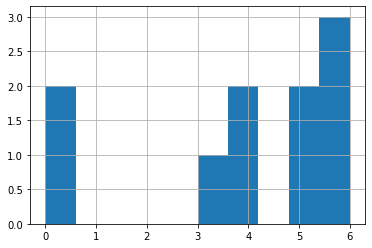

In [111]:
s.hist()

### Строковые методы

Series оснащен набором методов в атрибуте `str` для обработки строк, которые упрощают работу с каждым элементом массива. Обратите внимание, что сопоставление с образцом (pattern-matching) в `str` обычно использует [регулярные выражения](https://docs.python.org/3/library/re.html) по умолчанию (а в некоторых случаях всегда использует их), см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods).

In [113]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [118]:
s.str.contains('A')

0     True
1    False
2    False
3     True
4    False
5      NaN
6     True
7    False
8    False
dtype: object

## Объединение (Merge)

### Concat

pandas предоставляет различные средства для простого объединения объектов `Series` и `DataFrame` с различными видами логики множеств для индексов и функциональности реляционной алгебры в случае операций типа соединения (`join`) / слияния (`merge`), см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging).

Объединение объектов pandas вместе с помощью [`concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat):

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

In [ ]:
pieces = [df[:3], df[3:7], df[7:]] # разбиваем на части

In [ ]:
pd.concat(pieces)

Добавление столбца в [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) выполняется относительно быстро. Однако для добавления строки требуется создание копии, и это может стать трудозтратной операцией. Рекомендуем передавать предварительно созданный список записей в конструктор `DataFrame` вместо создания `DataFrame` путем итеративного добавления к нему записей. Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation).

### Присоединение (Join)

Слияние в стиле `SQL`, см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join).

In [128]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [129]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [133]:
pd.merge(left, right, on='key',how='right')

,key,lval,rval
0,foo,1,4
1,foo,1,5


Другой пример, который можно привести:

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

In [ ]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

In [ ]:
pd.merge(left, right, on='key')

## Группировка

Под группировкой (`"group by"`) понимаем процесс, включающий один или несколько следующих шагов: 

- Разделение (`Splitting`) данных на группы по некоторым критериям.
- Независимое применение (`Applying`) функции к каждой группе.
- Объединение (`Combining`) результатов в структуру данных.

Подробнее см. в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [134]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.910676,-0.323128
1,bar,one,-0.542649,0.201387
2,foo,two,-1.997463,-0.513002
3,bar,three,-1.157874,0.367045
4,foo,two,0.011068,0.845956
5,bar,two,1.704413,0.593174
6,foo,one,1.315647,-0.056438
7,foo,three,0.157354,0.128290


Группировка, а затем применение функции [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.sum.html#pandas.core.groupby.GroupBy.sum) к полученным группам.

In [135]:
df.groupby('A').sum()

,C,D
A,,
bar,0.003890,1.161606
foo,1.397282,0.081679


Группировка по нескольким столбцам образует иерархический (мультииндекс) индекс, и мы снова можем применить функцию `sum()`.

In [138]:
df.groupby(['A', 'B']).nunique()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

### Stack

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

In [ ]:
df2 = df[:4]
df2

Метод [`stack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) "сжимает" уровень в столбцах DataFrame.

In [ ]:
stacked = df2.stack()
stacked

С "уложенными" (`"stacked"`) DataFrame или Series (имеющими MultiIndex в качестве индекса) обратная операция - [`unstack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), которая по умолчанию распаковывает последний уровень:

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(1)

In [ ]:
stacked.unstack(0)

### Сводные таблицы (Pivot tables)

См. секцию [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot)

In [139]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.245243,-0.090932
1,one,B,foo,0.457672,1.780294
2,two,C,foo,-1.842502,0.296577
3,three,A,bar,-2.688354,1.138154
4,one,B,bar,-1.770322,0.050666
5,one,C,bar,-0.423140,-1.533793
6,two,A,foo,1.032589,0.616685
7,three,B,foo,-1.777333,0.930736
8,one,C,foo,1.056219,-0.407416
9,one,A,bar,0.301644,1.330668


Мы можем очень легко создать сводные таблицы из этих данных:

In [140]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.301644 -0.245243
      B -1.770322  0.457672
      C -0.423140  1.056219
three A -2.688354       NaN
      B       NaN -1.777333
      C  0.778308       NaN
two   A       NaN  1.032589
      B -0.036824       NaN
      C       NaN -1.842502

## Временные ряды

pandas имеет простые, мощные и эффективные функции для выполнения операций передискретизации во время преобразования частоты (например, преобразование секундных данных в 5-минутные данные). См. [документацию по временным рядам](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries).

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng[:10]

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts[:10]

In [ ]:
ts.resample('5Min').sum()

Представление часового пояса:

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

In [ ]:
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

Преобразование в другой часовой пояс:

In [ ]:
ts_utc.tz_convert('US/Eastern')

Преобразование между представлениями промежутка времени:

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

In [ ]:
ps = ts.to_period()
ps

In [ ]:
ps.to_timestamp()

Преобразование между периодом и меткой времени позволяет использовать некоторые удобные арифметические функции. В следующем примере мы преобразуем ежеквартальную частоту с годом, заканчивающимся в ноябре, в 9 утра конца месяца, следующего за концом квартала:

In [ ]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

In [ ]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts[:10]

In [ ]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts[:10]

In [ ]:
ts.head()

## Категории

pandas могут включать категориальные данные в `DataFrame`, см. [введение в категории](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) и [документацию по API](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical).

In [142]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], 
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Преобразуйте необработанные оценки в категориальный тип данных.

In [143]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Переименуйте категории в более выразительные имена (присвоение [`Series.cat.categories()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cat.categories.html#pandas.Series.cat.categories) на месте!)

In [144]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Сортировка осуществляется по категориям, а не в лексическом порядке.

In [ ]:
df.sort_values(by="grade")

При группировке по столбцу категорий также отображаются пустые категории.

In [ ]:
df.groupby("grade").size()

## Plotting

Подробнее в [Документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)

Используем стандартное соглашение для ссылки на `API matplotlib`:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range('1/1/2000', periods=1000))
ts

In [ ]:
ts = ts.cumsum()
ts

In [ ]:
ts.plot();

В `DataFrame` метод [`plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) удобен для построения всех столбцов с метками:

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df.head()

In [ ]:
df = df.cumsum()
df.head()

In [ ]:
df.plot(legend='best');

## Получение и записаь данных

### CSV

см. [про запись в csv файлы](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv)

In [145]:
df.to_csv('foo.csv')

см. [про чтенеи csv файлов](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)

In [146]:
pd.read_csv('foo.csv')

,Unnamed: 0,id,raw_grade,grade
0,0,1,a,NaN
1,1,2,b,NaN
2,2,3,b,NaN
3,3,4,a,NaN
4,4,5,a,NaN
5,5,6,e,NaN


### HDF5

см. про чтение и запись в [`HDFStores`](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5)

Запись в `HDF5` хранилище:

In [ ]:
df.to_hdf('foo.h5', 'df')

Чтение из `HDF5` хранилища:

In [ ]:
pd.read_hdf('foo.h5', 'df')

### Excel

см. [про чтение и запись в MS Excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel)

Запись в excel файл:

In [147]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Чтение из excel файла:

In [148]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,id,raw_grade,grade
0,0,1,a,NaN
1,1,2,b,NaN
2,2,3,b,NaN
3,3,4,a,NaN
4,4,5,a,NaN
5,5,6,e,NaN


## Подсказки (Gotchas)

Если пытаетесь выполнить операцию, то можете увидеть исключение, например:

In [ ]:
if pd.Series([False, True, False]):
    print("I was true")

Для объяснения см. ["Сравнения"](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-compare).

См. также ["Подсказки"](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas).